In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [8]:
df_us = df[(df['job_country'] == 'United States')].copy(deep=True)

In [31]:
job_titles = sorted(df_us["job_title_short"].value_counts().sort_values(ascending=False).head(3).index.to_list())


In [11]:
df_us_skills = df_us.explode('job_skills')

In [ ]:
df_us_skills_count = (
  df_us_skills #[df_us_skills['job_title_short'].isin(job_titles)]
  .groupby(['job_title_short','job_skills'])
  .agg(
    skill_count=('job_skills','count')
  )
)
df_us_skills_count = df_us_skills_count.reset_index()
df_us_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

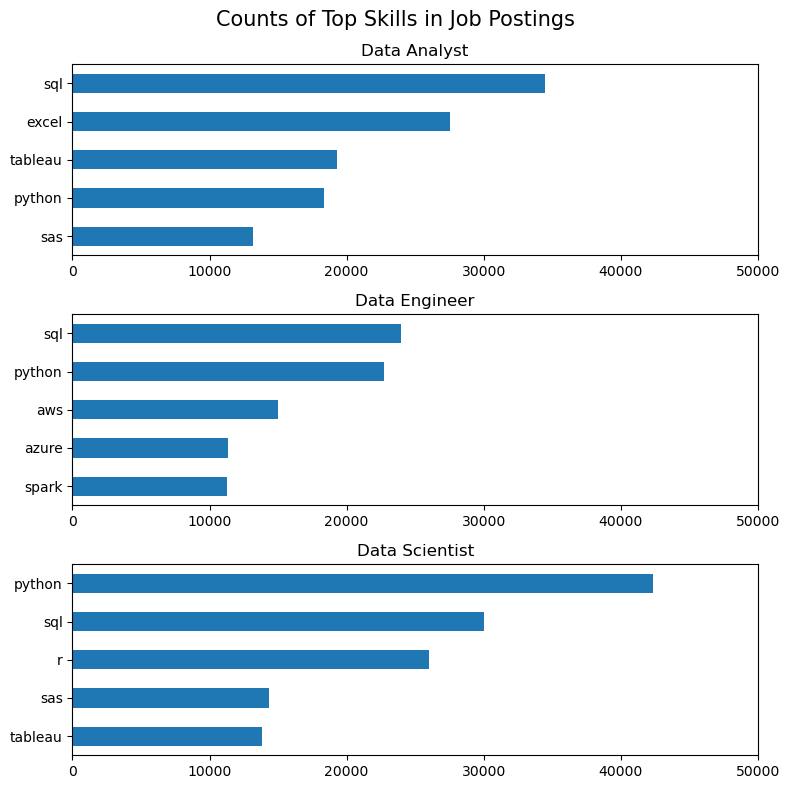

In [46]:
(fig, ax) = plt.subplots(len(job_titles),1)
fig.set_size_inches((8,8))
for (i,job_title) in enumerate(job_titles):
  df_plot= df_us_skills_count[df_us_skills_count['job_title_short'] == job_title].head(5)
  df_plot.plot(kind='barh', ax=ax[i], fig=fig, x='job_skills', y='skill_count', title=f"{job_title}")
  #sns.barplot(data=df_plot, y='job_skills', x='skill_count', legend=False, ax=ax[i], hue='skill_count', palette="dark:b_r")
  #ax[i].set_title(job_title)
  ax[i].invert_yaxis()
  ax[i].set_ylabel("")
  ax[i].set_xlabel("")
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0,50_000)
  
fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout()
plt.show() 

In [74]:
df_us_jobs_count = df_us['job_title_short'].value_counts().reset_index(name='job_count')

In [75]:
df_us_skills_pct = df_us_skills_count.merge(df_us_jobs_count, on='job_title_short', how='left')

In [79]:
df_us_skills_pct['skill_percent'] = 100* df_us_skills_pct['skill_count']/df_us_skills_pct['job_count']

In [80]:
df_us_skills_pct

,job_title_short,job_skills,skill_count,job_count,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


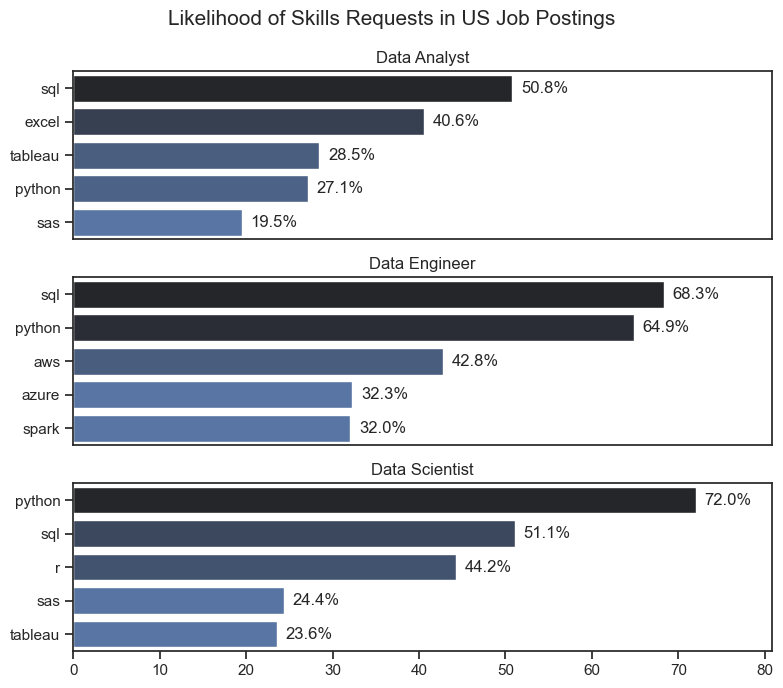

In [105]:
(fig, ax) = plt.subplots(len(job_titles),1)
sns.set_theme(style="ticks")
fig.set_size_inches((8,7))

max_pct = max(df_us_skills_pct['skill_percent'])
max_pct = min(max_pct+5,100)

for (i,job_title) in enumerate(job_titles):
  df_plot= df_us_skills_pct[df_us_skills_pct['job_title_short'] == job_title].head(5)
  sns.barplot(data=df_plot, y='job_skills', x='skill_percent',ax=ax[i], hue='skill_percent', palette="dark:b_r")

  for (n,v) in enumerate(df_plot["skill_percent"]):
    ax[i].text(v+1, n, f"{v:.1f}%", va="center")

  ax[i].set_title(job_title)
  ax[i].set_ylabel("")
  ax[i].set_xlabel("")
  #ax[i].legend().set_visible(False)
  ax[i].get_legend().remove()
  ax[i].set_xlim(0,max_pct)
  if i < len(job_titles) - 1:
    ax[i].set_xticks([])
  
fig.suptitle("Likelihood of Skills Requests in US Job Postings", fontsize=15)
fig.tight_layout()
plt.show() 